# Difference between magnetic dipole and loop sources

The derivation of the electromagnetic field in Hunziker et al. (2015) is for electric and magnetic point-dipole sources and receivers. The magnetic field due to a magnetic source ($mm$) is obtain from the electric field due to an electric source ($ee$) using the duality principle, given in their Equation (11),

$$
\hat{G}^{mm}_{pq}(\mathbf{x}, \mathbf{x'}, s, \eta_{kr}, \zeta_{ij}) =
-\hat{G}^{ee}_{pq}(\mathbf{x}, \mathbf{x'}, s, -\zeta_{kr}, -\eta_{ij}) \, . \qquad (1)
$$


Without going into the details of the different parameters, we can focus on the difference between the $mm$ and $ee$ fields for a homogeneous, isotropic fullspace by simplifying this further to 

$$
\mathbf{G}^{mm}_\text{dip-dip} =
\frac{\eta}{\zeta}\mathbf{G}^{ee} \quad \xrightarrow{\text{diff. approx}} \quad
\frac{\sigma}{\mathrm{i}\omega \mu}\mathbf{G}^{ee}_\text{dip-dip} \, . \qquad (2)
$$

Here, $\sigma$ is conductivity (S/m), $\omega=2\pi f$ is angular frequency (Hz), and $\mu$ is the magnetic permeability (H/m). So from Equation (2) we see that the $mm$  field differs from the $ee$ field by a factor $\sigma/(\mathrm{i}\omega\mu)$.

A magnetic dipole source has a moment of $I^mds$; however, a magnetic dipole source is basically never used in geophysics. Instead a loop of an electric wire is used, which generates a magnetic field. The moment generated by this loop is given by $I^m = \mathrm{i}\omega\mu N A I^e$, where $A$ is the area of the loop (m$^2$), and $N$ the number of turns of the loop. So the difference between a unit magnetic dipole and a unit loop ($A=1, N=1$) is the factor $\mathrm{i}\omega\mu$, hence Equation (2) becomes

$$
\mathbf{G}^{mm}_\text{loop-dip} =
\mathrm{i}\omega\mu\mathbf{G}^{mm}_\text{dip-dip} = \sigma\,\mathbf{G}^{ee}_\text{dip-dip} \, . \qquad (3)
$$

This notebook shows this relation in the frequency domain, as well as for impulse, step-on, and step-off responses in the time domain.

#### References
Hunziker, J., J. Thorbecke, and E. Slob, 2015, The electromagnetic response in a layered vertical transverse isotropic medium: A new look at an old problem: Geophysics, 80(1), F1–F18; DOI: [10.1190/geo2013-0411.1](https://doi.org/10.1190/geo2013-0411.1).

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')

## Survey parameters

- Homogenous fullspace of $\sigma$ = 0.01 S/m.
- Source at the origin, x-directed.
- Inline receiver with offset of 100 m, x-directed.

In [3]:
freq = np.logspace(-1, 5, 301)  # Frequencies (Hz)
time = np.logspace(-6, 0, 301)  # Times (s)
src = [0, 0, 0, 0, 0]           # x-directed source at the origin [x, y, z, azimuth, dip]
rec = [100, 0, 0, 0, 0]         # x-directed receiver 100m away from source, inline
cond = 0.01                     # Conductivity (S/m)

## Calculation using `empymod`

In [4]:
# Collect common parameters
inp = {'src': src, 'rec': rec, 'depth': [], 'res': 1/cond, 'verb': 1}

# Frequency domain
inp['freqtime'] = freq
fee_dip_dip = empymod.bipole(**inp)
fmm_dip_dip = empymod.bipole(msrc=True, mrec=True, **inp)
f_loo_dip = empymod.loop(**inp)

# Time domain
inp['freqtime'] = time

# ee
ee_dip_dip_of = empymod.bipole(signal=-1, **inp)
ee_dip_dip_im = empymod.bipole(signal=0, **inp)
ee_dip_dip_on = empymod.bipole(signal=1, **inp)

# mm dip-dip
dip_dip_of = empymod.bipole(signal=-1, msrc=True, mrec=True, **inp)
dip_dip_im = empymod.bipole(signal=0, msrc=True, mrec=True, **inp)
dip_dip_on = empymod.bipole(signal=1, msrc=True, mrec=True, **inp)

# mm loop-dip
loo_dip_of = empymod.loop(signal=-1, **inp)
loo_dip_im = empymod.loop(signal=0, **inp)
loo_dip_on = empymod.loop(signal=1, **inp)

## Plot the result

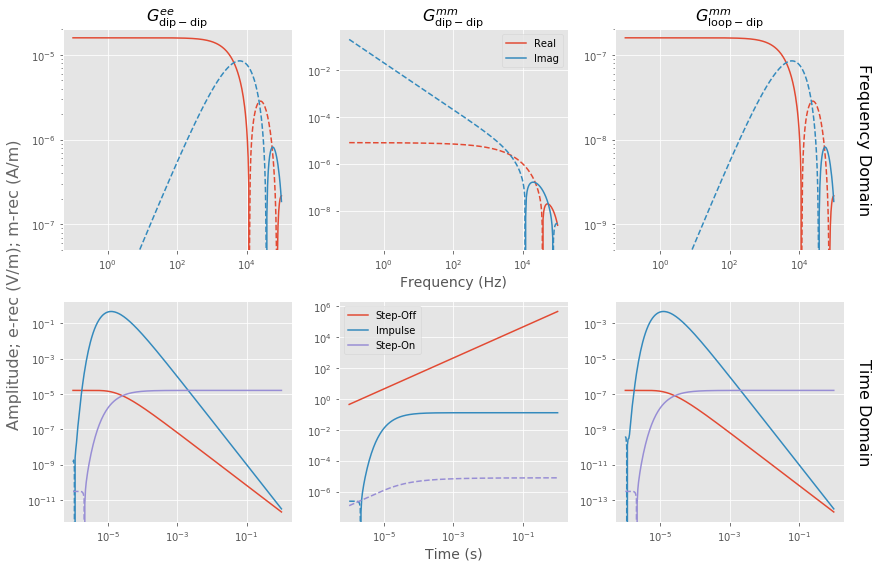

In [5]:
fs = 16  # Fontsize

# Figure
fig = plt.figure(figsize=(12, 8))

# Frequency Domain
plt.subplot(231)
plt.title(r'$G^{ee}_{\rm{dip-dip}}$', fontsize=fs)
plt.plot(freq, fee_dip_dip.real, 'C0-', label='Real')
plt.plot(freq, -fee_dip_dip.real, 'C0--')
plt.plot(freq, fee_dip_dip.imag, 'C1-', label='Imag')
plt.plot(freq, -fee_dip_dip.imag, 'C1--')
plt.xscale('log')
plt.yscale('log')
plt.ylim([5e-8, 2e-5])

ax1 = plt.subplot(232)
plt.title(r'$G^{mm}_{\rm{dip-dip}}$', fontsize=fs)
plt.plot(freq, fmm_dip_dip.real, 'C0-', label='Real')
plt.plot(freq, -fmm_dip_dip.real, 'C0--')
plt.plot(freq, fmm_dip_dip.imag, 'C1-', label='Imag')
plt.plot(freq, -fmm_dip_dip.imag, 'C1--')
plt.xscale('log')
#plt.ylim([-1e-6, 1e-6])
plt.yscale('log')
plt.xlabel('Frequency (Hz)', fontsize=fs-2)
plt.legend()

plt.subplot(233)
plt.title(r'$G^{mm}_{\rm{loop-dip}}$', fontsize=fs)
plt.plot(freq, f_loo_dip.real, 'C0-', label='Real')
plt.plot(freq, -f_loo_dip.real, 'C0--')
plt.plot(freq, f_loo_dip.imag, 'C1-', label='Imag')
plt.plot(freq, -f_loo_dip.imag, 'C1--')
plt.xscale('log')
plt.yscale('log')
plt.ylim([5e-10, 2e-7])

plt.text(1.05, 0.5, "Frequency Domain", {'fontsize': fs},
         horizontalalignment='left', verticalalignment='center',
         rotation=-90, clip_on=False, transform=plt.gca().transAxes)


# Time Domain

plt.subplot(234)
plt.plot(time, ee_dip_dip_of, 'C0-', label='Step-Off')
plt.plot(time, -ee_dip_dip_of, 'C0--')
plt.plot(time, ee_dip_dip_im, 'C1-', label='Impulse')
plt.plot(time, -ee_dip_dip_im, 'C1--')
plt.plot(time, ee_dip_dip_on, 'C2-', label='Step-On')
plt.plot(time, -ee_dip_dip_on, 'C2--')
plt.xscale('log')
plt.yscale('log')

plt.subplot(235)
plt.plot(time, dip_dip_of, 'C0-', label='Step-Off')
plt.plot(time, -dip_dip_of, 'C0--')
plt.plot(time, dip_dip_im, 'C1-', label='Impulse')
plt.plot(time, -dip_dip_im, 'C1--')
plt.plot(time, dip_dip_on, 'C2-', label='Step-On')
plt.plot(time, -dip_dip_on, 'C2--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (s)', fontsize=fs-2)
plt.legend()

plt.subplot(236)
plt.plot(time, loo_dip_of, 'C0-', label='Step-Off')
plt.plot(time, -loo_dip_of, 'C0--')
plt.plot(time, loo_dip_im, 'C1-', label='Impulse')
plt.plot(time, -loo_dip_im, 'C1--')
plt.plot(time, loo_dip_on, 'C2-', label='Step-On')
plt.plot(time, -loo_dip_on, 'C2--')
plt.xscale('log')
plt.yscale('log')

plt.text(1.05, 0.5, "Time Domain", {'fontsize': fs},
         horizontalalignment='left', verticalalignment='center',
         rotation=-90, clip_on=False, transform=plt.gca().transAxes)


fig.text(-0.01, 0.5, 'Amplitude; e-rec (V/m); m-rec (A/m)',
         va='center', rotation='vertical', fontsize=fs, color='.4')

plt.tight_layout()
plt.show()

The figure shows the main points of Equations (2) and (3):

- The magnetic dipole-dipole response differs by a factor $\sigma/(\mathrm{i}\omega\mu)$ from the electric dipole-dipole response. That means for the time-domain that the magnetic response looks more like the time derivative of the electric response (e.g., the magnetic impulse responses resembles the electric step-on response).

- The magnetic loop-dipole response differs only by $\sigma$ from the electric dipole-dipole response, hence a factor of 0.01.

The units of the response only depend on the receiver, what the receiver actually measures. So if we change the source from a dipole to a loop it does not change the units of the received responses.

In [6]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Sat Oct 19 12:13:37 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
            7.7 GB : RAM
           Jupyter : Environment

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

            1.16.5 : numpy
             1.3.1 : scipy
            1.10.0 : empymod
             2.7.0 : numexpr
             7.8.0 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------